# Multi Layer Perceptron Model 5 : **fetal-health-classification Dataset**:

In [31]:
# Dataset from Kaggle
!kaggle datasets download -d andrewmvd/fetal-health-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 61.4MB/s]


In [32]:
# unzip the downloaded dataset
!unzip /content/fetal-health-classification.zip

Archive:  /content/fetal-health-classification.zip
  inflating: fetal_health.csv        


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7548 - loss: 0.6809 - val_accuracy: 0.8912 - val_loss: 0.2804
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8894 - loss: 0.2993 - val_accuracy: 0.9118 - val_loss: 0.2491
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9116 - loss: 0.2302 - val_accuracy: 0.9000 - val_loss: 0.2313
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9037 - loss: 0.2129 - val_accuracy: 0.9029 - val_loss: 0.2429
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9286 - loss: 0.1792 - val_accuracy: 0.9029 - val_loss: 0.2267
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - loss: 0.1970 - val_accuracy: 0.9088 - val_loss: 0.2204
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 0.1640 - val_accuracy: 0.9176 - val_loss: 0.2247
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.1461 - val_accuracy: 0.9235 - val_

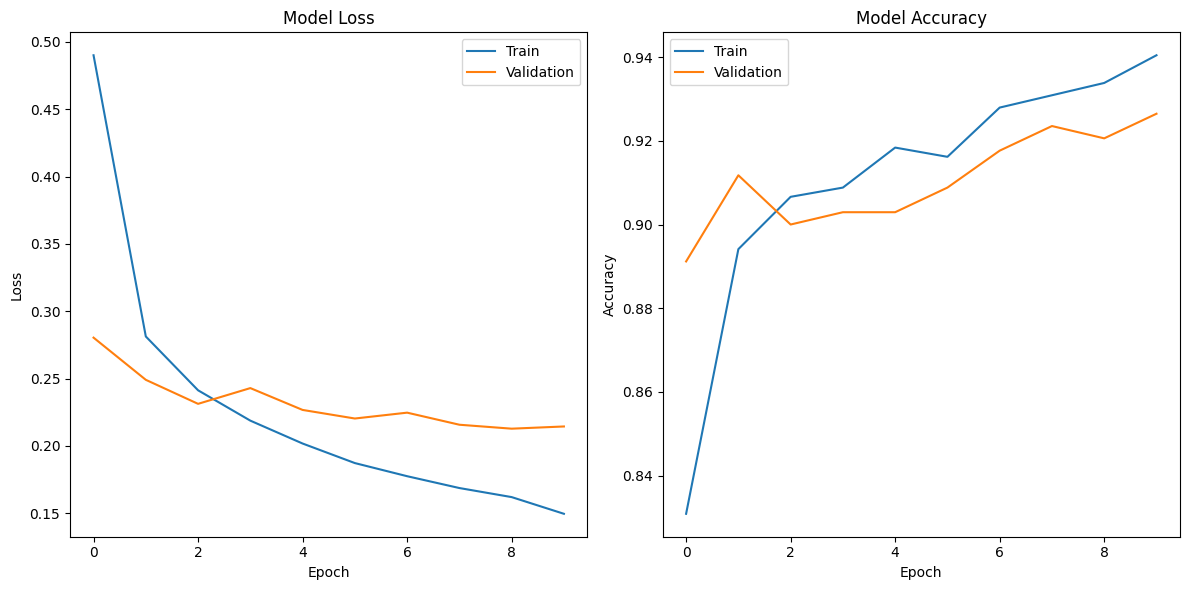

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the dataset
data = pd.read_csv('./fetal_health.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Features and labels
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels, subtracting 1 to shift the range to [0, 2]
y = np.array(y) - 1  # Adjust labels to be in range [0, 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes based on the example data

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()